In [ ]:
!git clone https://github.com/ennauata/houseganpp.git
import os
os.chdir('houseganpp')
!sudo apt-get install python-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz==1.6
!pip install svgwrite
!pip install webcolors

In [ ]:
from dataset.floorplan_dataset_maps_functional_high_res import FloorplanGraphDataset, floorplan_collate_fn
import torchvision.transforms as transforms
import torch
import numpy as np
from misc.utils import draw_graph
!mkdir dump
import matplotlib.pyplot as plt

In [ ]:
data_path = "./data/sample_list.txt"
fp_dataset_test = FloorplanGraphDataset(data_path, transforms.Normalize(mean=[0.5], std=[0.5]), split='test')
fp_loader = torch.utils.data.DataLoader(fp_dataset_test, 
                                        batch_size=1, 
                                        shuffle=False, collate_fn=floorplan_collate_fn)
for i, sample in enumerate(fp_loader):
        # draw real graph and groundtruth
        _, nds, eds, _, _ = sample
        real_nodes = np.where(nds.detach().cpu()==1)[-1]
        graph = [nds, eds]
        

In [ ]:
conversion = {"living_room": 1, "kitchen": 2, "bedroom": 3, "bathroom": 4, "balcony": 5, "entrance": 6, "dining": 7, "study": 8,
              "storage": 10 , "front_door": 15, "unknown": 16, "interior_door": 17}
ulta = {conversion[i]:i for i in conversion.keys()}
ulta

def one_hot_encoding_v2(nodes):
    length = 18
    ans = []
    for k in nodes:
        temp = [0 if i != k else 1 for i in range(1, length+1)]
        ans.append(temp)
    return torch.Tensor(ans)

def process_edges_v2(nodes, edges):
    prep_edgs = []
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if j > i:
                if [i, j] in edges or [j, i] in edges:
                    prep_edgs.append([i, 1, j])
                else:
                    prep_edgs.append([i, -1, j])
    return torch.tensor(prep_edgs, dtype=torch.int32)

/content/houseganpp/misc/utils.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


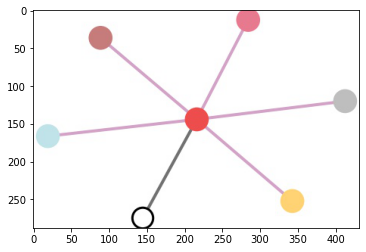

/content/houseganpp/misc/utils.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_eds = torch.tensor(given_eds).long()
/content/houseganpp/misc/utils.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_masks = torch.tensor(prev_mks)


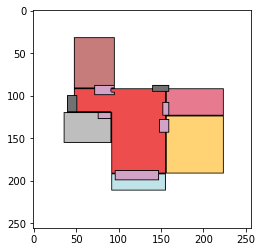

In [ ]:
room_type = [5, 3, 7, 4, 2, 1, 17, 17, 17, 17, 17, 15]
# room_type = ["balcony", "bedroom", "bedroom", "bathroom", "kitchen", "living_room"]
ed_rm = [[0], [0, 5], [0], [0], 
           [1], [1, 5], [1], [1], 
           [2], [2], [2], [2, 5], 
           [3, 5], [3], [3], [3], 
           [4], [4], [4], [4, 5], 
           [5], [5], [5], [5, 4], [5], [5, 2], [5, 3], [5, 1], [5], [5, 0], 
           [6], [6, 5], [6], [6, 1], 
           [7], [7, 5], [7], [7, 0], 
           [8], [8, 2], [8], [8, 5], 
           [9, 5], [9], [9, 3], [9], 
           [10], [10, 4], [10], [10, 5], 
           [11], [11], [11], [11, 5]]

room_type, e = one_hot_encoding_v2(room_type), process_edges_v2(room_type, ed_rm)
# room_type = torch.tensor(room_type)
get_graph(room_type, e)

/content/houseganpp/misc/utils.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


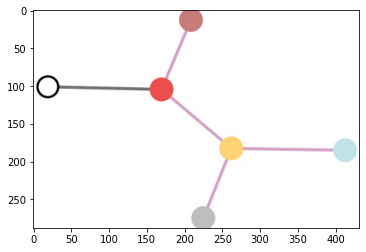

/content/houseganpp/misc/utils.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_eds = torch.tensor(given_eds).long()
/content/houseganpp/misc/utils.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_masks = torch.tensor(prev_mks)


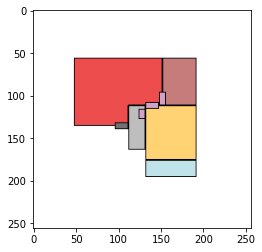

In [ ]:
# Custom random try
""" Living --- kitchen --- bedroom --- toilet --- balcony"""
room_type = [1, 2, 3, 4, 5, 15, 17, 17, 17]
ed_rm = [ [0,1], [0,2], [0,5], [0,6], [0,7],
          [1,0], [1,6],
          [2,0], [2,3], [2,4], [2,7], [2, 8],
          [3,2], [3, 8],
          [4,2],
          [5,0],
          [6,0], [6,1],
          [7,0], [7,2],
          [8, 3], [8,2]]

room_type, e = one_hot_encoding_v2(room_type), process_edges_v2(room_type, ed_rm)
get_graph(room_type, e)

In [ ]:
conversion = {1: 'living', 2: 'kitchen', 3: 'bedroom', 
              4: 'bathroom', 5: 'balcony', 6: 'entrance', 
              7: 'dining', 8: 'study', 9: 'storage', 15: 'door', 
              17: 'khaali'}
ulta = {conversion[i]:i for i in conversion.keys()}
ulta

{'balcony': 5,
 'bathroom': 4,
 'bedroom': 3,
 'dining': 7,
 'door': 15,
 'entrance': 6,
 'khaali': 17,
 'kitchen': 2,
 'living': 1,
 'storage': 9,
 'study': 8}

In [ ]:
def one_hot_encoding(nodes):
    length = 18
    ans = []
    for k in nodes:
        temp = [0 if i != ulta[k] else 1 for i in range(1, length+1)]
        ans.append(temp)
    return torch.Tensor(ans)
def process_edges(nodes, edges):
    prep_edgs = []
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if j > i:
                if [i, j] in edges or [j, i] in edges:
                    prep_edgs.append([i, 1, j])
                else:
                    prep_edgs.append([i, -1, j])
    return torch.tensor(prep_edgs, dtype=torch.int32)

In [ ]:
def _infer(graph, model, prev_state=None):
    
    # configure input to the network
    z, given_masks_in, given_nds, given_eds = _init_input(graph, prev_state)
    # run inference model
    with torch.no_grad():
        masks = model(z.to(device), given_masks_in.to(device), given_nds.to(device), given_eds.to(device))
        masks = masks.detach().cpu().numpy()
    return masks

def get_graph(nds, eds):
    out = 'dump'
    graph = [nds, eds]
    real_nodes = np.where(nds.detach().cpu()==1)[-1]
    true_graph_obj, graph_im = draw_graph([real_nodes, eds.detach().cpu().numpy()])
    plt.imshow(graph_im)
    plt.show()
    _types = sorted(list(set(real_nodes)))
    selected_types = [_types[:k+1] for k in range(10)]
    os.makedirs('./{}/'.format(out), exist_ok=True)
    _round = 0
    
    # initialize layout
    state = {'masks': None, 'fixed_nodes': []}
    masks = _infer(graph, model, state)
    im0 = draw_masks(masks.copy(), real_nodes)
    im0 = torch.tensor(np.array(im0).transpose((2, 0, 1)))/255.0 
    i=0
    save_image(im0, './{}/fp_init_{}.png'.format(out, i), nrow=1, normalize=False) # visualize init image

    # generate per room type
    for _iter, _types in enumerate(selected_types):
        _fixed_nds = np.concatenate([np.where(real_nodes == _t)[0] for _t in _types]) if len(_types) > 0 else np.array([]) 
        state = {'masks': masks, 'fixed_nodes': _fixed_nds}
        masks = _infer(graph, model, state)
        
    # save final floorplans
    imk = draw_masks(masks.copy(), real_nodes)
    imk = torch.tensor(np.array(imk).transpose((2, 0, 1)))/255.0 
    plt.imshow(imk.permute(1, 2, 0))
    save_image(imk, './fp_final_{}.png'.format(i), nrow=1, normalize=False)

In [ ]:
from models.models import Generator
from misc.utils import _init_input, ID_COLOR, draw_masks, draw_graph, estimate_graph
from torchvision.utils import save_image
# Initialize generator and discriminator
checkpoint = './checkpoints/pretrained.pth'
model = Generator()
model.load_state_dict(torch.load(checkpoint, map_location=torch.device('cpu')))
model = model.eval()
device = torch.device('cpu')
# Initialize variables
if torch.cuda.is_available():
    device = torch.device('cuda')
    model.cuda()

Node:  torch.Size([6, 18])
Edges:  tensor([[ 0,  1,  1],
        [ 0,  1,  2],
        [ 0, -1,  3],
        [ 0, -1,  4],
        [ 0, -1,  5],
        [ 1, -1,  2],
        [ 1,  1,  3],
        [ 1, -1,  4],
        [ 1,  1,  5],
        [ 2, -1,  3],
        [ 2,  1,  4],
        [ 2, -1,  5],
        [ 3, -1,  4],
        [ 3, -1,  5],
        [ 4, -1,  5]], dtype=torch.int32)


/content/houseganpp/misc/utils.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


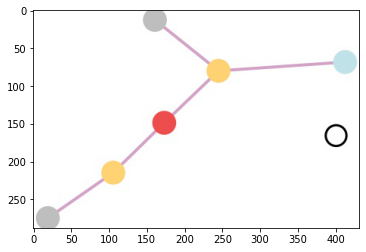

/content/houseganpp/misc/utils.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_eds = torch.tensor(given_eds).long()
/content/houseganpp/misc/utils.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_masks = torch.tensor(prev_mks)


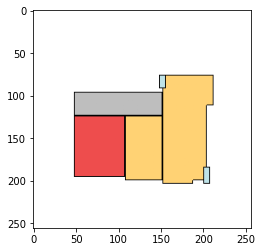

In [ ]:
nodes = ['living',
         'bedroom',
         'bedroom',
         'bathroom',
         'bathroom',
         'balcony',
        #  'khaali',
        #  'door'
]
edges = [
         [0],
         [0, 1],
         [0, 2],
         [0, 6],
         [0, 7],
         [1],
         [1, 0],
         [1, 3],
         [1, 5],
         [1,6],
         [2],
         [2, 0],
         [2, 4],
         [3],
         [3, 1],
         [4],
         [4, 2],
         [5],
         [5, 1],
         [6],
         [6, 0],
         [7],
         [7, 0],
          [7]
        #  [2, 3],
        #  [3, 2],
        #  [3, 1],
]
n, e = one_hot_encoding(nodes), process_edges(nodes, edges)
print("Node: ",n.shape)
print("Edges: ",e)
get_graph(n, e)

/content/houseganpp/misc/utils.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


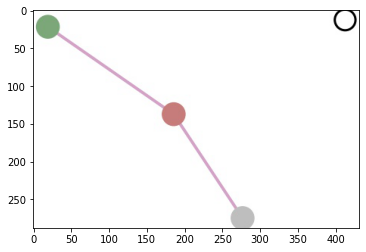

/content/houseganpp/misc/utils.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_eds = torch.tensor(given_eds).long()
/content/houseganpp/misc/utils.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_masks = torch.tensor(prev_mks)


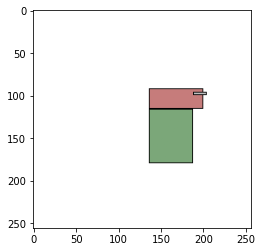

In [ ]:
nodes = ['entrance', 'kitchen','bathroom']
edges = [[1], [1], [1], [1], [0], [1, 2], [0], [0], [2], [1, 2], [0, 1], [1], [2], [1]]
n, e = one_hot_encoding(nodes), process_edges(nodes, edges)
get_graph(n, e)

In [ ]:
e

tensor([[ 0,  1,  1],
        [ 0,  1,  2],
        [ 0, -1,  3],
        [ 0, -1,  4],
        [ 0, -1,  5],
        [ 0,  1,  6],
        [ 0,  1,  7],
        [ 1, -1,  2],
        [ 1,  1,  3],
        [ 1, -1,  4],
        [ 1,  1,  5],
        [ 1, -1,  6],
        [ 1, -1,  7],
        [ 2, -1,  3],
        [ 2,  1,  4],
        [ 2, -1,  5],
        [ 2, -1,  6],
        [ 2, -1,  7],
        [ 3, -1,  4],
        [ 3, -1,  5],
        [ 3, -1,  6],
        [ 3, -1,  7],
        [ 4, -1,  5],
        [ 4, -1,  6],
        [ 4, -1,  7],
        [ 5, -1,  6],
        [ 5, -1,  7],
        [ 6, -1,  7]], dtype=torch.int32)

In [ ]:
nds

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
eds

tensor([[ 0, -1,  1],
        [ 0, -1,  2],
        [ 0, -1,  3],
        [ 0, -1,  4],
        [ 0,  1,  5],
        [ 0, -1,  6],
        [ 0, -1,  7],
        [ 0,  1,  8],
        [ 0, -1,  9],
        [ 0, -1, 10],
        [ 0, -1, 11],
        [ 1, -1,  2],
        [ 1, -1,  3],
        [ 1, -1,  4],
        [ 1,  1,  5],
        [ 1, -1,  6],
        [ 1,  1,  7],
        [ 1, -1,  8],
        [ 1, -1,  9],
        [ 1, -1, 10],
        [ 1, -1, 11],
        [ 2,  1,  3],
        [ 2, -1,  4],
        [ 2, -1,  5],
        [ 2,  1,  6],
        [ 2, -1,  7],
        [ 2, -1,  8],
        [ 2, -1,  9],
        [ 2, -1, 10],
        [ 2, -1, 11],
        [ 3, -1,  4],
        [ 3,  1,  5],
        [ 3,  1,  6],
        [ 3, -1,  7],
        [ 3, -1,  8],
        [ 3,  1,  9],
        [ 3, -1, 10],
        [ 3, -1, 11],
        [ 4,  1,  5],
        [ 4, -1,  6],
        [ 4, -1,  7],
        [ 4, -1,  8],
        [ 4, -1,  9],
        [ 4,  1, 10],
        [ 4, -1, 11],
        [ 

/content/houseganpp/misc/utils.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


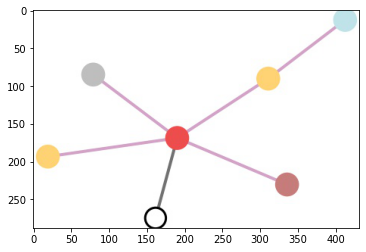

/content/houseganpp/misc/utils.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_eds = torch.tensor(given_eds).long()
/content/houseganpp/misc/utils.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  given_masks = torch.tensor(prev_mks)


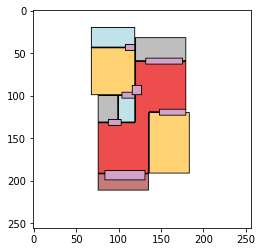

In [ ]:
get_graph(nds, eds)

In [ ]:
nds

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

/content/houseganpp/misc/utils.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


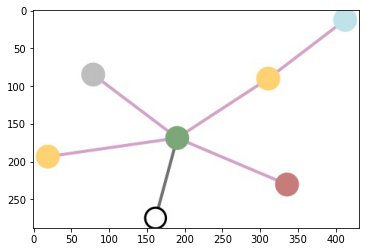

In [ ]:
get_graph([nds, eds])

In [ ]:
nds.shape

torch.Size([12, 18])

In [ ]:
nds[5]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
nds[5] = torch.Tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
nds, eds

(tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 t